# Fractals

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tools.fractools as ft
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

# Increase font size of plots
plt.rcParams.update({'font.size': 13.5})

# Automatically reload modules with saved changes
%load_ext autoreload
%autoreload 2

---
## Koch snowflake
The procedure for generating a Koch snowflake starts with a line bound by two points. The line is split into 3 equal segments defined by 4 points, and the central segment is then bent into an angle (conventionally 60 degrees), thereby resulting in a shape consisting of 4 lines. This sequence is applied iteratively to each line, resulting in a Koch fractal, which can be stitched with two rotated copies of itself to form a Koch snowflake.

In [ ]:
# >>> Plot a basic Koch snowflake

# Initial points and test snowflake
x = np.array([-1, 1])
y = np.array([0, 0])
s = ft.koch_snowflake(x, y, 8, np.pi/3)

# Create a square figure and plot the snowflake
fig, ax = plt.subplots(figsize = (5, 5))
ax.plot(s[0], s[1], color = 'b', lw = 1)

# Remove ticks and show plot
ax.set_xticks([]), ax.set_yticks([])
plt.savefig('outputs/snowflake.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
# >>> Make an animation of varying Koch angles

# Specify number of frames
nframes = 300

# Initial line definition
x = np.array([-1, 1])
y = np.array([0, 0])

# Set angle values and calculate a snowflake for each one
thetas = np.linspace(0.01, 1.99*np.pi, nframes)
snowflakes = [ft.koch_snowflake(x, y, 5, theta) for theta in tqdm(thetas)]

# Set temporary formatting
with mpl.rc_context({'lines.linewidth': 2, 'axes.facecolor': 'black'},):

    # Create figure first and format
    fig, ax = plt.subplots(figsize = (5, 5))
    fig.patch.set_alpha(0)

    # Define a frame update function
    def update_koch(frame):
        ax.clear()
        plt.plot(snowflakes[frame][0], snowflakes[frame][1], color = 'b')
        ax.set_xticks([])
        ax.set_yticks([])
        return

    # Save the animation as a gif
    anim = FuncAnimation(fig, update_koch, frames = tqdm(range(nframes)), blit = False)
    anim.save('outputs/koch_snowflake.gif', writer = 'pillow', fps = 20, dpi = 300)

---
## Sierpinski triangle
A Sierpinski triangle is formed by connecting the midpoints of all three edges of an equilateral triangle, thereby dividing it into four equilateral triangles, and repeating indefinitely.

In [ ]:
# >>> Plot a basic Sierpinski triangle

# Create a square figure first
fig, ax = plt.subplots(figsize = (5, 5))

# Initial points and test triangle
triangle = np.array([(-1, -1), (1, -1), (0, 1)])
ft.sierpinski_triangle(ax, triangle, 6, color = 'b', lw = '0.1')

# Remove ticks, set axis limits, and show plot
ax.set_xticks([]), ax.set_yticks([])
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.show()

In [ ]:
# >>> Make an animation of varying Koch angles

# Specify number of frames
nframes = 60

# Set size of steps for zooming in
step_size = 1/nframes

# Create figure first and format
fig, ax = plt.subplots(figsize = (5, 5))
fig.patch.set_alpha(0)
ax.set_xticks([]), ax.set_yticks([])

# Plot all the triangles first
triangle = np.array([[-1, -1], [1, -1], [0, 1]])
ft.sierpinski_triangle(ax, triangle, 8, color = 'b', lw = '0.1')

# Define a frame update function that gradually zooms in
def update_sierpinski(frame):
    plt.xlim(-(1 - frame*step_size), 1)
    plt.ylim(-1, (1 - frame*step_size))
    return

# Save the animation as a gif
anim = FuncAnimation(fig, update_sierpinski, frames = tqdm(range(nframes + 1)), blit = False)
anim.save('outputs/sierpinski.gif', writer = 'pillow', fps = 30, dpi = 300)

---
## Julia sets

In [2]:
from tools.fractools import complex

100%|██████████| 300/300 [00:07<00:00, 38.29it/s] 


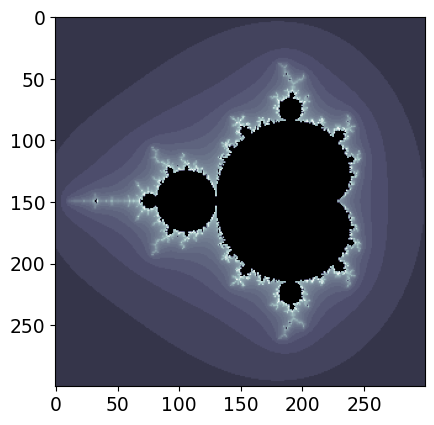

In [79]:
# mandelbrot set
import matplotlib.colors as mplc

z = complex(0, 0)
n_vals = 300
a_vals = np.linspace(-2.1, 1, n_vals)
b_vals = np.linspace(-1.5, 1.5, n_vals)
d = np.array([[complex.iterate(z, complex(a, b), max_iter = 100, threshold = 5) for b in b_vals] for a in tqdm(a_vals, position = 0)])

plt.imshow(d.T, cmap = 'bone', norm = mplc.LogNorm())

100%|██████████| 500/500 [00:12<00:00, 39.46it/s] 


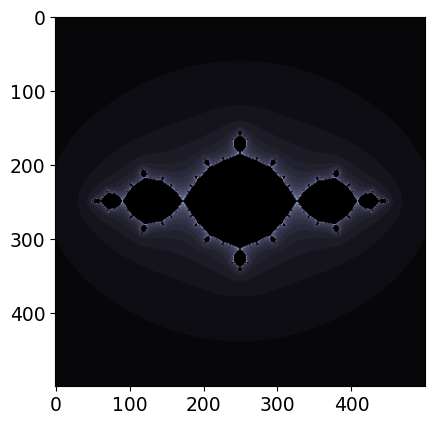

In [81]:
# julia set
import matplotlib.colors as mplc

c = complex(-1, 0)
n_vals = 500
a_vals = np.linspace(-2, 2, n_vals)
b_vals = np.linspace(-2, 2, n_vals)
d = np.array([[complex.iterate(complex(a, b), c, max_iter = 100, threshold = 10) for b in b_vals] for a in tqdm(a_vals, position = 0)])

plt.imshow(d.T, cmap = 'bone')

100%|██████████| 500/500 [00:08<00:00, 60.48it/s] 


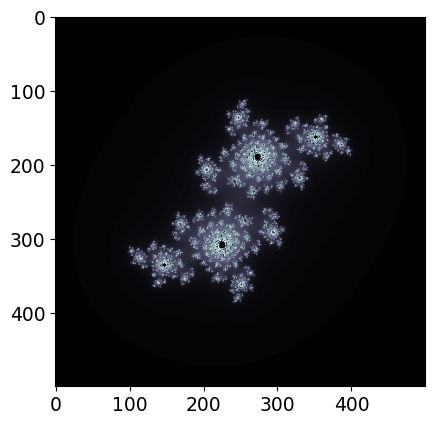

In [78]:
# julia set
import matplotlib.colors as mplc

c = complex(0, 0.66)
n_vals = 500
a_vals = np.linspace(-2, 2, n_vals)
b_vals = np.linspace(-2, 2, n_vals)
d = np.array([[complex.iterate(complex(a, b), c, max_iter = 100, threshold = 10) for b in b_vals] for a in tqdm(a_vals, position = 0)])

plt.imshow(d.T, cmap = 'bone')